<a href="https://colab.research.google.com/github/spdr-lily/Descomplica-Data-Science/blob/main/previsao_de_precos_de_imoveis_com_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Caso: Previsão de Preços de Imóveis
Contexto: Uma imobiliária deseja prever os preços de imóveis com base em diversas características dos imóveis, como o número de quartos, metragem quadrada, localização, e ano de construção. Utilizaremos a regressão linear múltipla para criar um modelo preditivo.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

In [13]:
# Gerando dados fictícios para exemplificar
np.random.seed(42)
idade = np.random.randint(18, 70, 200)
renda = np.random.randint(20000, 100000, 200)
clicou_anuncio = np.random.choice([0, 1], size=200, p=[0.7, 0.3])

In [14]:
# Criando DataFrame com os dados
df_log = pd.DataFrame({
    'Idade': idade,
    'Renda': renda,
    'Clicou_Anuncio': clicou_anuncio
})

In [15]:
# Dividindo os dados em variáveis de entrada (X) e saída (y)
X_log = df_log[['Idade', 'Renda']]
y_log = df_log['Clicou_Anuncio']

In [16]:
# Divisão dos dados em conjuntos de treinamento e teste
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [17]:
# Criação do modelo de regressão logística
modelo_logistico = LogisticRegression()

In [18]:
# Treinamento do modelo
modelo_logistico.fit(X_train_log, y_train_log)

LogisticRegression()

In [19]:
# Previsões no conjunto de teste
predicoes_log = modelo_logistico.predict(X_test_log)

In [20]:
# Avaliação do modelo
accuracy = accuracy_score(y_test_log, predicoes_log)
precision = precision_score(y_test_log, predicoes_log)
recall = recall_score(y_test_log, predicoes_log)
f1 = f1_score(y_test_log, predicoes_log)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
# Print dos resultados
print(f'Precisão: {precision}')
print(f'Recall: {recall}')
print(f'Pontuação F1: {f1}')
print(f'Acurácia: {accuracy}')
print(f'Matriz de Confusão:\n{confusion_matrix(y_test_log, predicoes_log)}')
print(f'Relatório de Classificação:\n{classification_report(y_test_log, predicoes_log)}')

Precisão: 0.0
Recall: 0.0
Pontuação F1: 0.0
Acurácia: 0.7
Matriz de Confusão:
[[28  0]
 [12  0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        28
           1       0.00      0.00      0.00        12

    accuracy                           0.70        40
   macro avg       0.35      0.50      0.41        40
weighted avg       0.49      0.70      0.58        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


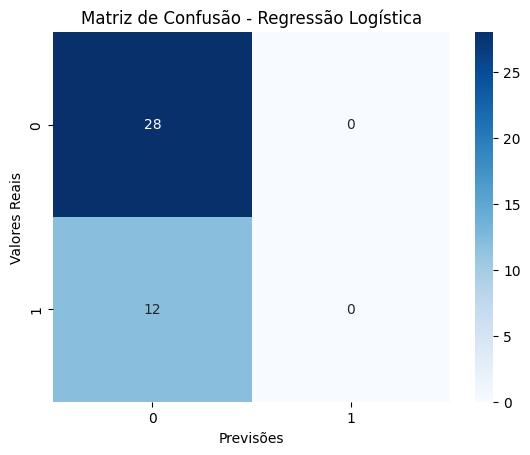

In [22]:
# Visualização da matriz de confusão
sns.heatmap(confusion_matrix(y_test_log, predicoes_log), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Previsões')
plt.ylabel('Valores Reais')
plt.show()